In [1]:

# imports
import os
import sys
import types
import json

# figure size/format
fig_width = 7
fig_height = 5
fig_format = 'retina'
fig_dpi = 96

# matplotlib defaults / format
try:
  import matplotlib.pyplot as plt
  plt.rcParams['figure.figsize'] = (fig_width, fig_height)
  plt.rcParams['figure.dpi'] = fig_dpi
  plt.rcParams['savefig.dpi'] = fig_dpi
  from IPython.display import set_matplotlib_formats
  set_matplotlib_formats(fig_format)
except Exception:
  pass

# plotly use connected mode
try:
  import plotly.io as pio
  pio.renderers.default = "notebook"
except Exception:
  pass

# enable pandas latex repr when targeting pdfs
try:
  import pandas as pd
  if fig_format == 'pdf':
    pd.set_option('display.latex.repr', True)
except Exception:
  pass



# output kernel dependencies
kernel_deps = dict()
for module in list(sys.modules.values()):
  # Some modules play games with sys.modules (e.g. email/__init__.py
  # in the standard library), and occasionally this can cause strange
  # failures in getattr.  Just ignore anything that's not an ordinary
  # module.
  if not isinstance(module, types.ModuleType):
    continue
  path = getattr(module, "__file__", None)
  if not path:
    continue
  if path.endswith(".pyc") or path.endswith(".pyo"):
    path = path[:-1]
  if not os.path.exists(path):
    continue
  kernel_deps[path] = os.stat(path).st_mtime
print(json.dumps(kernel_deps))

# set run_path if requested
if r'':
  os.chdir(r'')

# reset state
%reset

def ojs_define(**kwargs):
  import json
  from IPython.core.display import display, HTML

  # do some minor magic for convenience when handling pandas
  # dataframes
  def convert(v):
    try:
      import pandas as pd
    except ModuleNotFoundError: # don't do the magic when pandas is not available
      return v
    if type(v) == pd.DataFrame:
      j = json.loads(v.T.to_json(orient='split'))
      return dict((k,v) for (k,v) in zip(j["index"], j["data"]))
    else:
      return v
  
  v = dict(contents=list(dict(name=key, value=convert(value)) for (key, value) in kwargs.items()))
  display(HTML('<script type="ojs-define">' + json.dumps(v) + '</script>'), metadata=dict(ojs_define = True))
globals()["ojs_define"] = ojs_define


{"/home/tales/mambaforge/lib/python3.9/importlib/_bootstrap.py": 1653671420.0, "/home/tales/mambaforge/lib/python3.9/importlib/_bootstrap_external.py": 1653671420.0, "/home/tales/mambaforge/lib/python3.9/codecs.py": 1653671418.0, "/home/tales/mambaforge/lib/python3.9/encodings/aliases.py": 1653671420.0, "/home/tales/mambaforge/lib/python3.9/encodings/__init__.py": 1653671421.0, "/home/tales/mambaforge/lib/python3.9/encodings/utf_8.py": 1653671421.0, "/home/tales/mambaforge/lib/python3.9/encodings/latin_1.py": 1653671421.0, "/home/tales/mambaforge/lib/python3.9/abc.py": 1653671418.0, "/home/tales/mambaforge/lib/python3.9/io.py": 1653671418.0, "/home/tales/mambaforge/lib/python3.9/stat.py": 1653671418.0, "/home/tales/mambaforge/lib/python3.9/_collections_abc.py": 1653671418.0, "/home/tales/mambaforge/lib/python3.9/genericpath.py": 1653671418.0, "/home/tales/mambaforge/lib/python3.9/posixpath.py": 1653671418.0, "/home/tales/mambaforge/lib/python3.9/os.py": 1653671418.0, "/home/tales/mamba

/tmp/ipykernel_194613/3386239726.py:20: DeprecationWarning:

`set_matplotlib_formats` is deprecated since IPython 7.23, directly use `matplotlib_inline.backend_inline.set_matplotlib_formats()`



In [2]:
#| output: false
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns
from datetime import datetime



fire_df = pd.read_csv('data/amazon.csv', encoding = 'Latin-1')
precitation_df = pd.read_csv('data/precipitation.csv')

In [3]:
fire_df.head()

,year,state,month,number,date
0,1998,Acre,Janeiro,0.0,1998-01-01
1,1999,Acre,Janeiro,0.0,1999-01-01
2,2000,Acre,Janeiro,0.0,2000-01-01
3,2001,Acre,Janeiro,0.0,2001-01-01
4,2002,Acre,Janeiro,0.0,2002-01-01


In [4]:
fire_df.dtypes

year        int64
state      object
month      object
number    float64
date       object
dtype: object

In [5]:
fire_df.shape

(6454, 5)

In [6]:
precitation_df.head()

,state,date,precipitation
0,BA,31/01/1998,63.6
1,BA,28/02/1998,55.6
2,BA,31/03/1998,117.2
3,BA,30/04/1998,206.0
4,BA,31/05/1998,250.9


In [7]:
precitation_df.dtypes


state             object
date              object
precipitation    float64
dtype: object

In [8]:
precitation_df.shape

(5814, 3)

In [9]:
sorted(fire_df.month.unique())

['Abril',
 'Agosto',
 'Dezembro',
 'Fevereiro',
 'Janeiro',
 'Julho',
 'Junho',
 'Maio',
 'Março',
 'Novembro',
 'Outubro',
 'Setembro']

In [10]:
# Dictionary with month translations
month_map={'Janeiro': 1, 'Fevereiro': 2, 'Março': 3, 'Abril': 4, 'Maio': 5,
          'Junho': 6, 'Julho': 7, 'Agosto': 8, 'Setembro': 9, 'Outubro': 10,
          'Novembro': 11, 'Dezembro': 12}
#mapping months
fire_df['month']=fire_df['month'].map(month_map)

In [11]:
sorted(fire_df.month.unique())

[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12]

In [12]:
sorted(fire_df.state.unique())


['Acre',
 'Alagoas',
 'Amapa',
 'Amazonas',
 'Bahia',
 'Ceara',
 'Distrito Federal',
 'Espirito Santo',
 'Goias',
 'Maranhao',
 'Mato Grosso',
 'Minas Gerais',
 'Paraiba',
 'Pará',
 'Pernambuco',
 'Piau',
 'Rio',
 'Rondonia',
 'Roraima',
 'Santa Catarina',
 'Sao Paulo',
 'Sergipe',
 'Tocantins']

In [13]:
# Dictionary with correct state name
state_map={'Acre':'Acre',
           'Alagoas':'Alagoas',
           'Amapa':'Amapá',
           'Amazonas':'Amazonas',
           'Bahia':'Bahia',
           'Ceara':'Ceará',
           'Distrito Federal':'Distrito Federal',
           'Espirito Santo':'Espírito Santo',
           'Goias':'Goiás',
           'Maranhao':'Maranhão',
           'Mato Grosso':'Mato Grosso',
           'Minas Gerais':'Minas Gerais',
           'Paraiba':'Paraíba',
           'Pará':'Pará',
           'Pernambuco':'Pernambuco',
           'Piau':'Piauí',
           'Rio':'Rio de Janeiro',
           'Rondonia': 'Rondônia',
           'Roraima':'Roraima',
           'Santa Catarina':'Santa Catarina',
           'Sao Paulo':'São Paulo',
           'Sergipe': 'Sergipe',
           'Tocantins': 'Tocantins'
           }

#mapping state
fire_df['state']=fire_df['state'].map(state_map)

In [14]:
sorted(fire_df.state.unique())

['Acre',
 'Alagoas',
 'Amapá',
 'Amazonas',
 'Bahia',
 'Ceará',
 'Distrito Federal',
 'Espírito Santo',
 'Goiás',
 'Maranhão',
 'Mato Grosso',
 'Minas Gerais',
 'Paraíba',
 'Pará',
 'Pernambuco',
 'Piauí',
 'Rio de Janeiro',
 'Rondônia',
 'Roraima',
 'Santa Catarina',
 'Sergipe',
 'São Paulo',
 'Tocantins']

In [15]:
#| output: false

# Delete date column from dataset
fire_df.pop("date")

fire_df['month'] = fire_df['month'].astype(str)
fire_df['year'] = fire_df['year'].astype(str)

# Change Order Coumns in dataset
fire_df.insert(0, 'state', fire_df.pop('state'))

In [16]:
fire_df.head()

,state,year,month,number
0,Acre,1998,1,0.0
1,Acre,1999,1,0.0
2,Acre,2000,1,0.0
3,Acre,2001,1,0.0
4,Acre,2002,1,0.0


In [17]:
precitation_df.state.unique()

array(['BA', 'RR', 'SE', 'AL', 'TO', 'GO', 'PI', 'MG', 'PR', 'MA', 'AP',
       'RJ', 'AC', 'AM', 'DF', 'PE', 'CE', 'PA', 'MT', 'PB', 'RS', 'RN',
       'SP', 'ES', 'SC'], dtype=object)

In [18]:
states = {
    'AC': 'Acre',
    'AL': 'Alagoas',
    'AP': 'Amapá',
    'AM': 'Amazonas',
    'BA': 'Bahia',
    'CE': 'Ceará',
    'DF': 'Distrito Federal',
    'ES': 'Espírito Santo',
    'GO': 'Goiás',
    'MA': 'Maranhão',
    'MT': 'Mato Grosso',
    'MS': 'Mato Grosso do Sul',
    'MG': 'Minas Gerais',
    'PA': 'Pará',
    'PB': 'Paraíba',
    'PR': 'Paraná',
    'PE': 'Pernambuco',
    'PI': 'Piauí',
    'RJ': 'Rio de Janeiro',
    'RN': 'Rio Grande do Norte',
    'RS': 'Rio Grande do Sul',
    'RO': 'Rondônia',
    'RR': 'Roraima',
    'SC': 'Santa Catarina',
    'SP': 'São Paulo',
    'SE': 'Sergipe',
    'TO': 'Tocantins'
}

#mapping our translated months
precitation_df['state'] = precitation_df['state'].map(states)
#checking the state column for the second time after the changes were made
precitation_df.state.unique()


array(['Bahia', 'Roraima', 'Sergipe', 'Alagoas', 'Tocantins', 'Goiás',
       'Piauí', 'Minas Gerais', 'Paraná', 'Maranhão', 'Amapá',
       'Rio de Janeiro', 'Acre', 'Amazonas', 'Distrito Federal',
       'Pernambuco', 'Ceará', 'Pará', 'Mato Grosso', 'Paraíba',
       'Rio Grande do Sul', 'Rio Grande do Norte', 'São Paulo',
       'Espírito Santo', 'Santa Catarina'], dtype=object)

In [19]:
#| output: false

#Cast the date column to date type
precitation_df['date'] = pd.to_datetime(pd.Series(precitation_df.date), format='%d/%m/%Y')

# Create a Column with Year
precitation_df['year'] =  pd.DatetimeIndex(precitation_df['date']).year
precitation_df['year'] = precitation_df['year'].astype(str)
# Create a Column with Month
precitation_df['month'] =  pd.DatetimeIndex(precitation_df['date']).month
precitation_df['month'] = precitation_df['month'].astype(str)


# Delete date column from dataset
precitation_df.pop("date")

# Change Order Coumns in dataset
precitation_df.insert(0, 'state', precitation_df.pop('state'))

# Agregate Precipitation by state, year and month
precitation_df = precitation_df.groupby(['state', 'year', 'month']).sum().reset_index()

In [20]:
precitation_df.head()

,state,year,month,precipitation
0,Acre,1998,1,335.5
1,Acre,1998,10,265.6
2,Acre,1998,11,304.8
3,Acre,1998,12,404.2
4,Acre,1998,2,299.4


In [21]:
df = pd.merge(fire_df, precitation_df, how = "left", on=["state", "year", "month"])

In [22]:
df.head()

,state,year,month,number,precipitation
0,Acre,1998,1,0.0,335.5
1,Acre,1999,1,0.0,463.6
2,Acre,2000,1,0.0,188.8
3,Acre,2001,1,0.0,317.2
4,Acre,2002,1,0.0,217.3


In [23]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6454 entries, 0 to 6453
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   state          6454 non-null   object 
 1   year           6454 non-null   object 
 2   month          6454 non-null   object 
 3   number         6454 non-null   float64
 4   precipitation  5941 non-null   float64
dtypes: float64(2), object(3)
memory usage: 302.5+ KB


In [24]:
df.isna().sum()

state              0
year               0
month              0
number             0
precipitation    513
dtype: int64

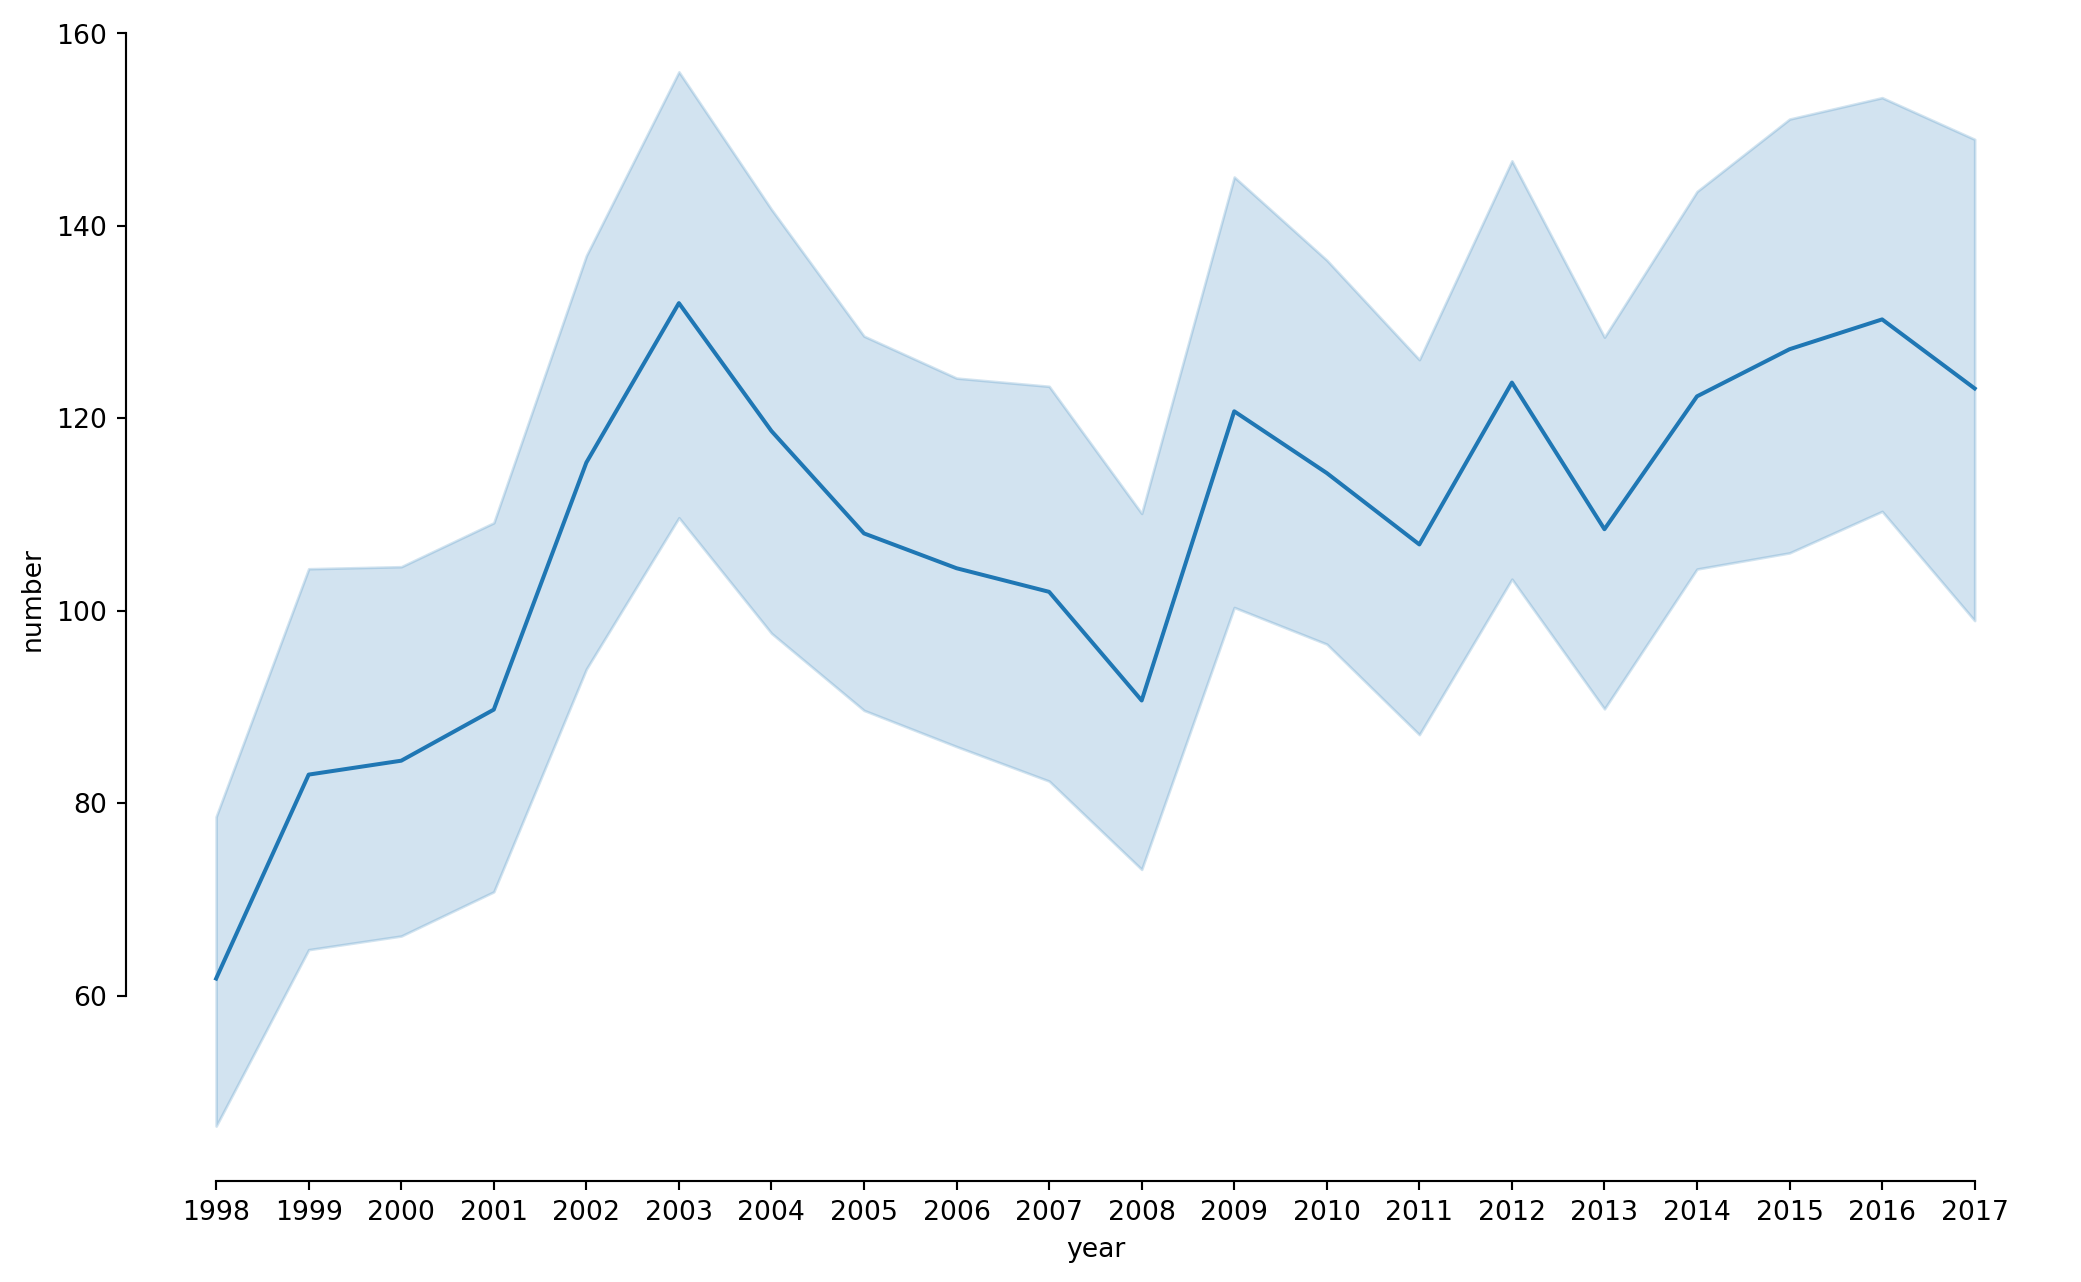

In [25]:
#| column: page
#| fig-align: center
plt.figure(figsize=(13,8))
sns.lineplot(x="year", y="number",
            palette=["m", "g"],
            data=df)
sns.despine(offset=1, trim=True)

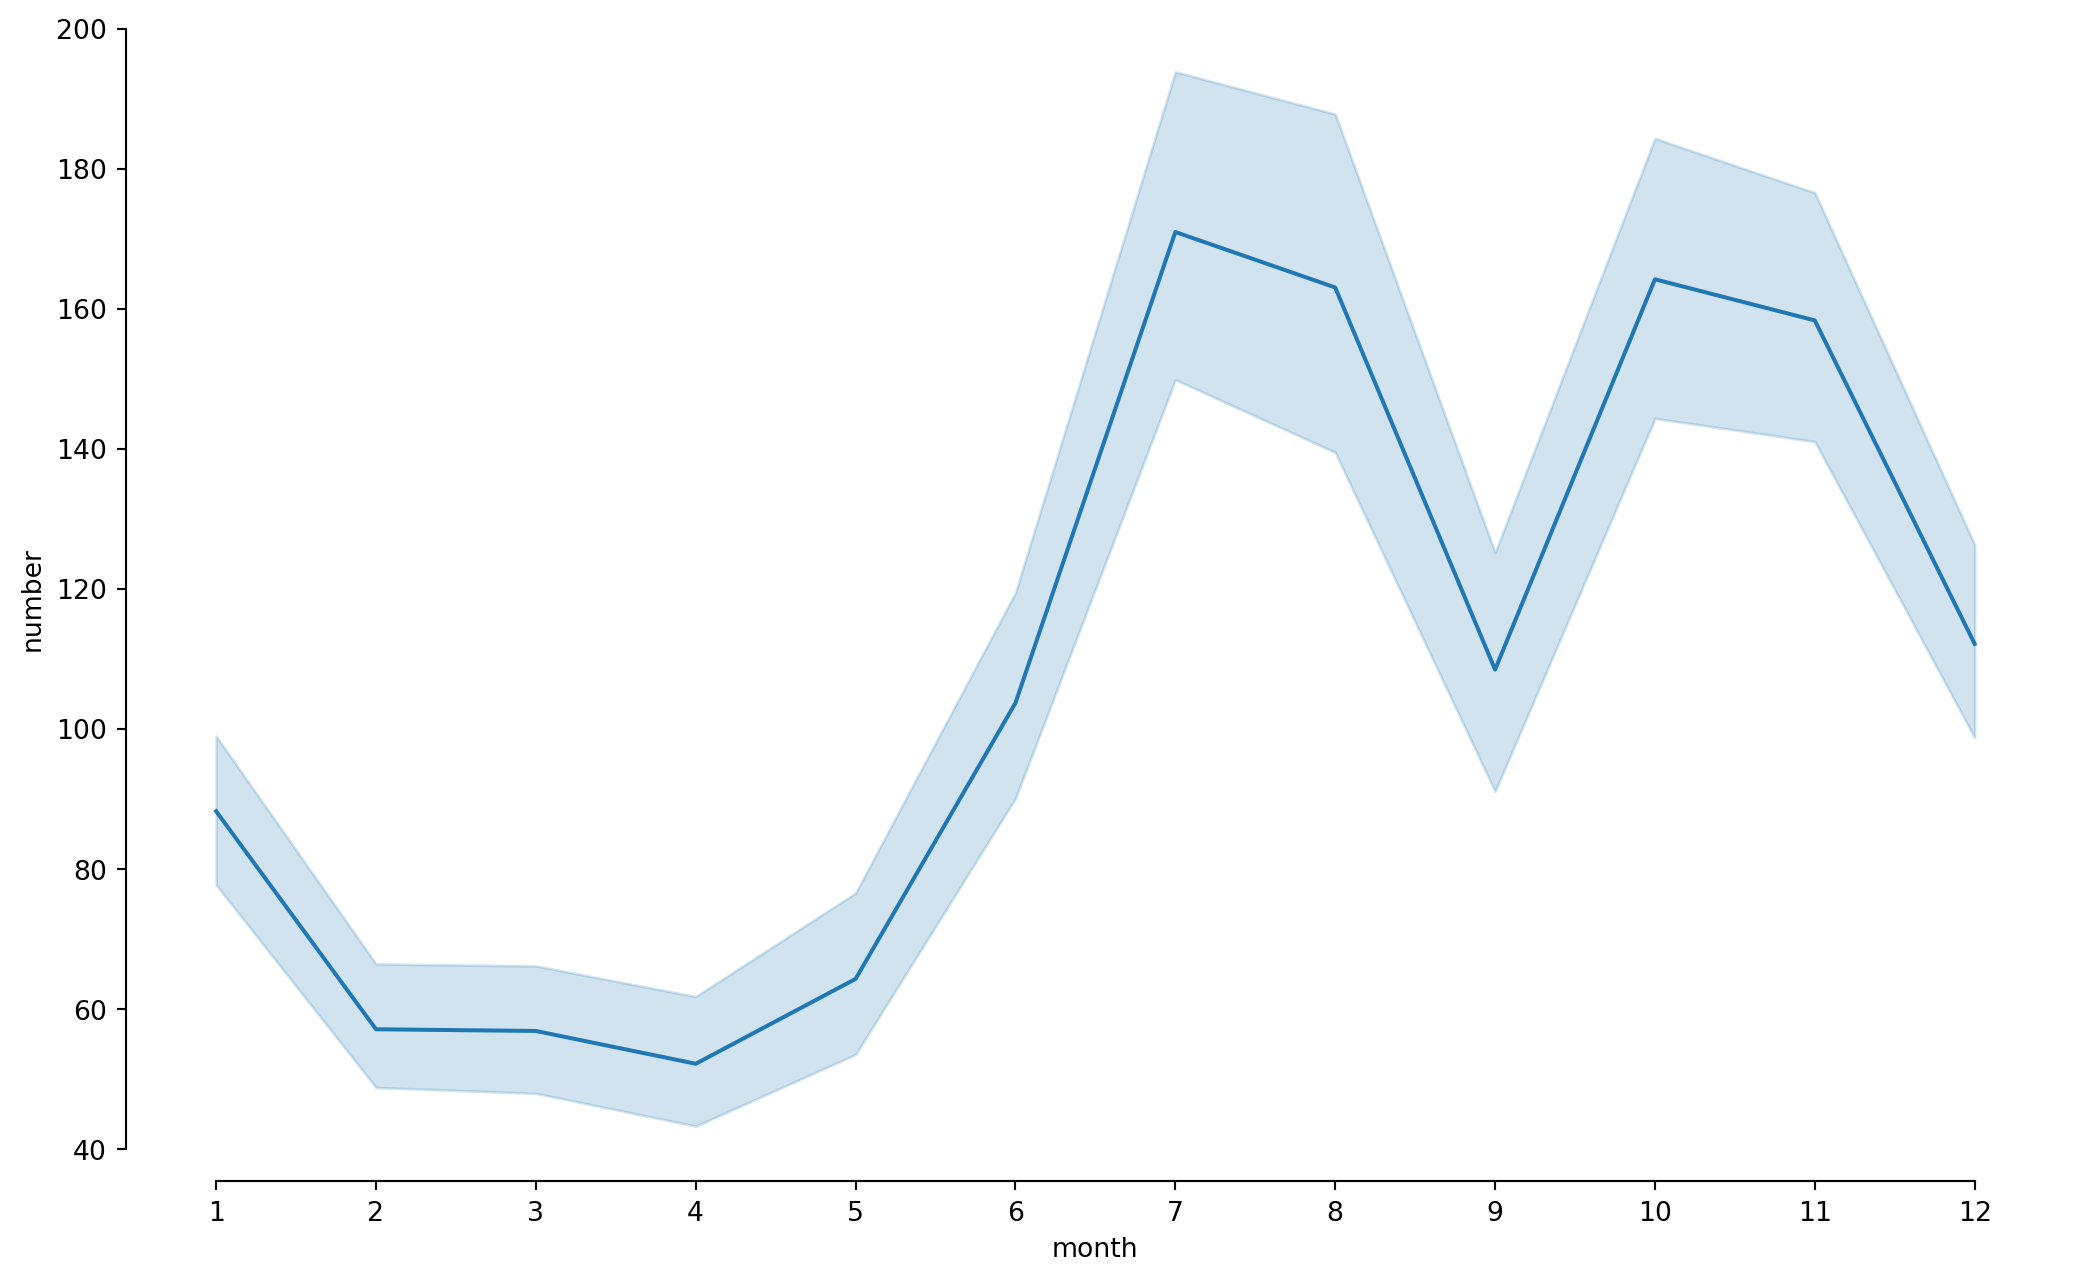

In [26]:
#| column: page
#| fig-align: center
plt.figure(figsize=(13,8))
ax = sns.lineplot(x="month", y="number",
          palette=["m", "g"],
            data=df)
sns.despine(offset=1, trim=True)

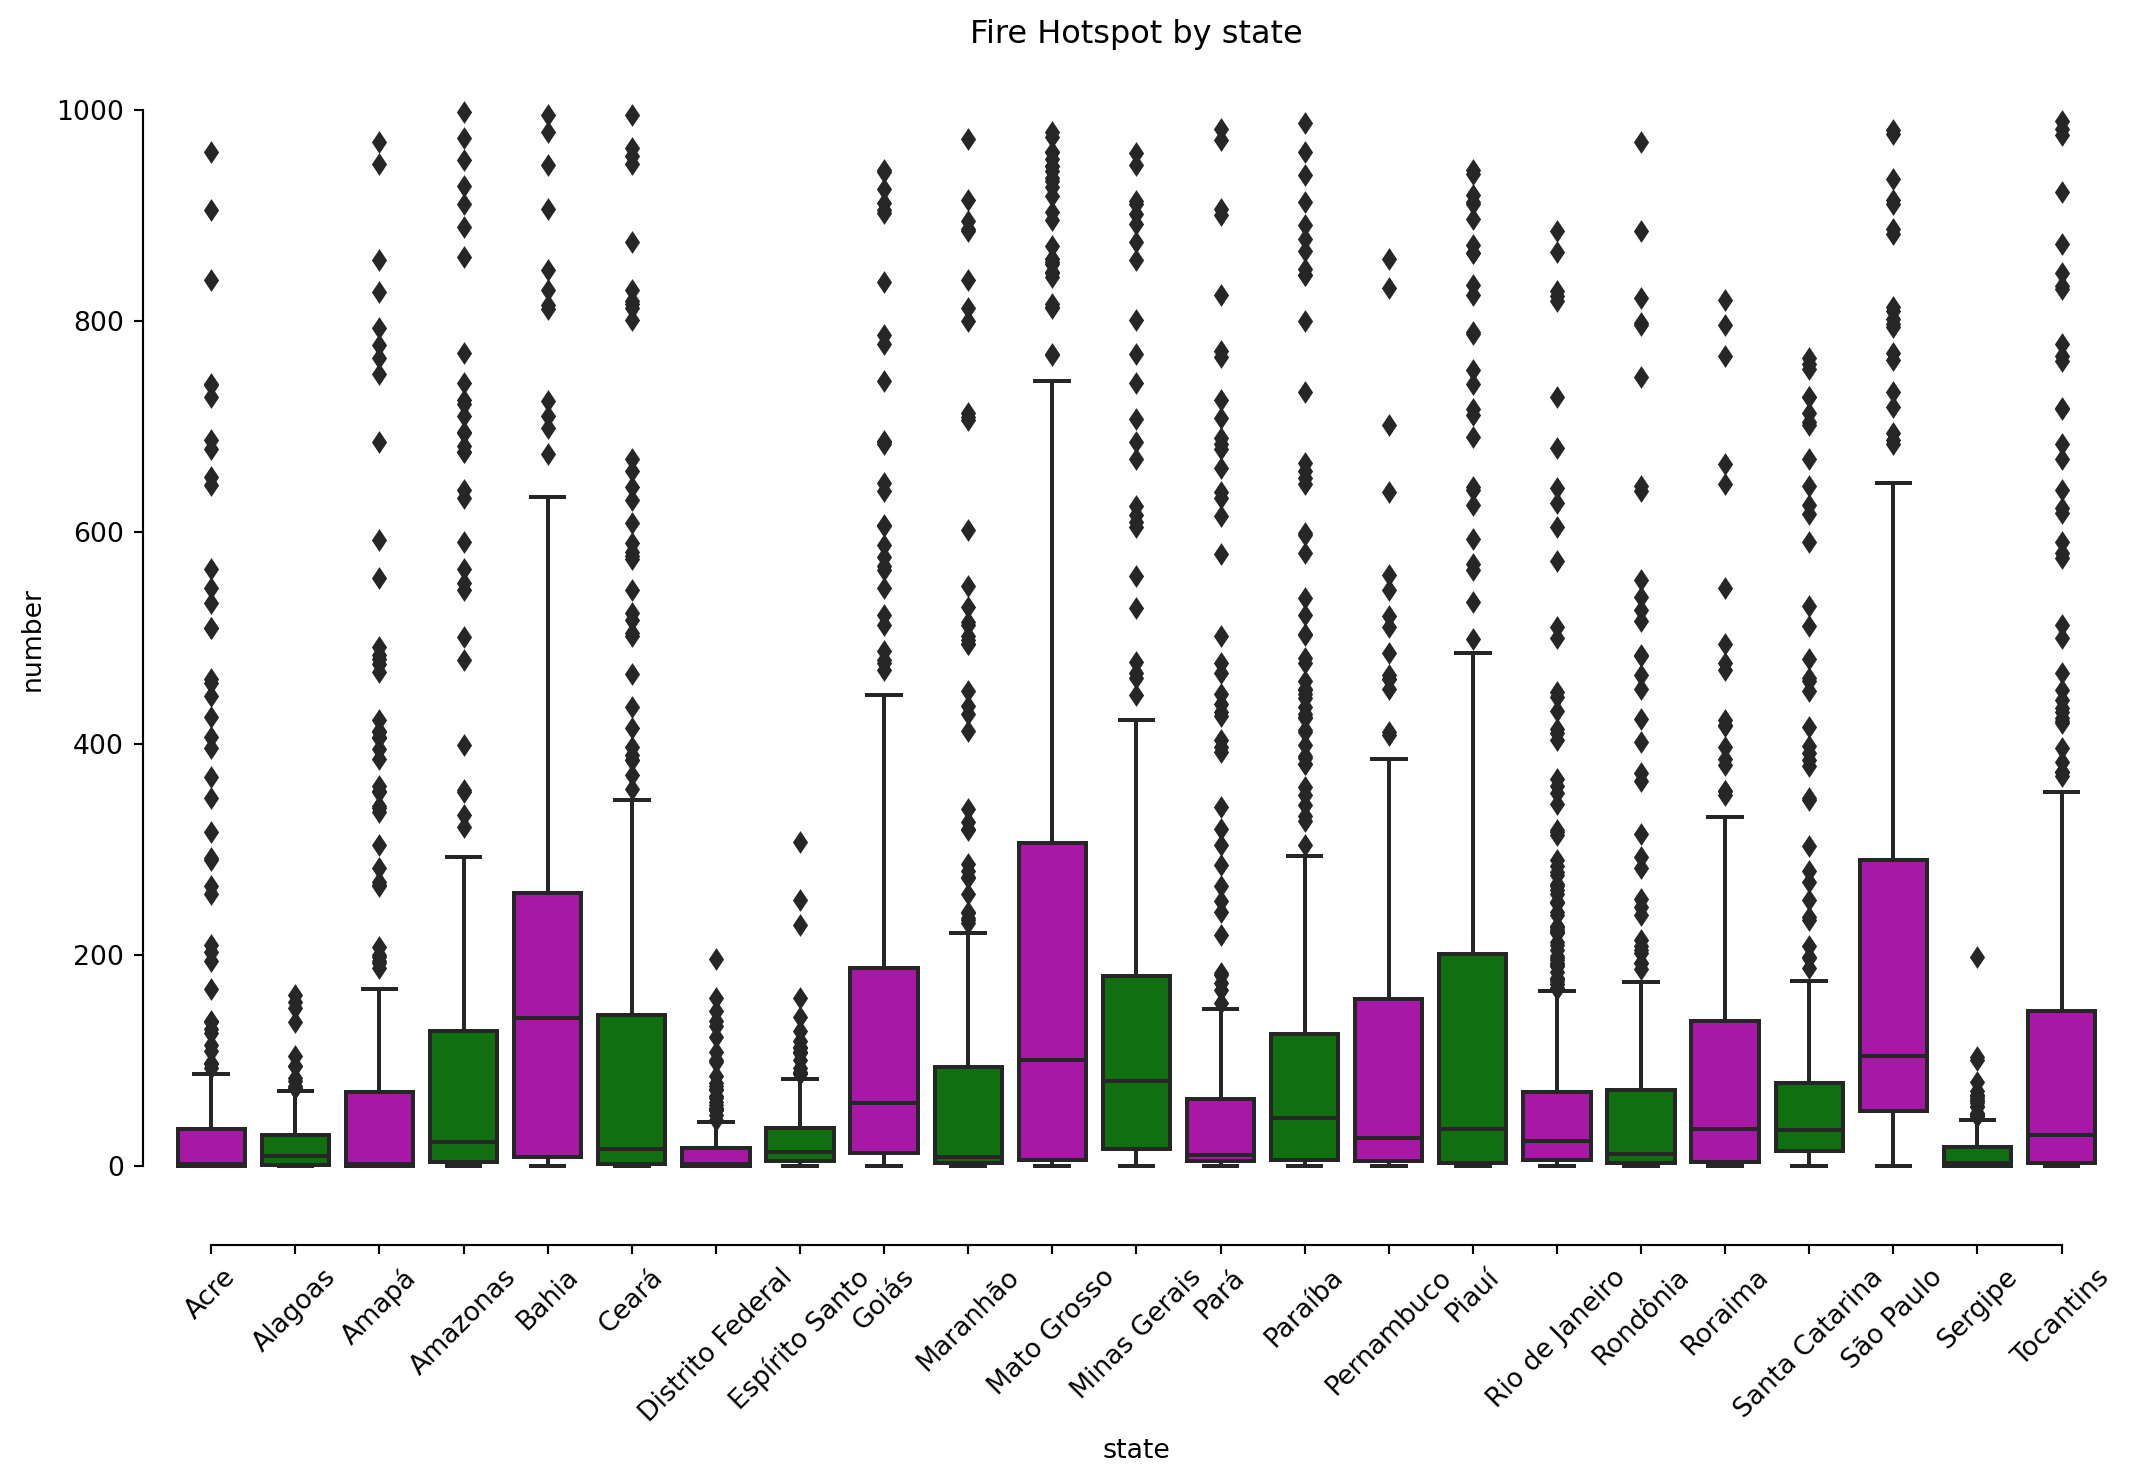

In [27]:
#| column: page
#| fig-align: center

plt.figure(figsize=(13,8))
ax = sns.boxplot(x="state", y="number",
          palette=["m", "g"],
            data=df)
ax.set_title("Fire Hotspot by state")
sns.despine(offset=10, trim=True)
plt.xticks(rotation=45)
plt.show()